In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sql

# Make Popularity (craigslist Phoenix)

In [3]:
import pandas as pd
from pandas import Series, DataFrame

conn = sql.connect('example.db')
cursor = conn.cursor()

all_data = pd.read_sql_query("SELECT * from cars", conn)
all_data = all_data.fillna(value='?')

all_data

,title,year,make,model,odometer,paintcolor,titlestatus,price
0,1999 Ford E350 converted Grooming shuttle bus ...,1999,ford,e350,167000,white,clean,"$13,500"
1,2008 Jeep Rubicon Unlimited and Matching Off R...,2008,jeep,wrangler,180000,yellow,clean,"$32,500"
2,1999 Lexus ES300 Coach Edition,1999,lexus,es300,147000,?,clean,"$5,450"
3,2017 Dodge Challenger SXT Plus,2017,dodge,challenger,66000,blue,clean,"$23,950"
4,Ford F150 Lariat 2019,2019,ford,f-150,10150,silver,clean,"$49,500"
...,...,...,...,...,...,...,...,...
112,1998 Dodge Viper GTS / 1-Owner / 25k Miles / M...,1998,dodge,viper,25100,silver,clean,"$75,000"
113,2007 Dodge Ram 1500 Crew Cab 4X4,2007,dodge,ram,169000,?,clean,"$12,900"
114,2013 Volkswagen Beetle TURBO,2013,?,beetle,89551,black,clean,"$10,950"
115,2000 Ford xlt f350 diesel 4×4,2000,ford,f350,-1,white,clean,"$16,000"


Making a dictionary, with the key being the make and value being the occurences.

In [4]:
from collections import Counter
def get_make_count(data: DataFrame):
    try:
        dicc = Counter(data.make)
    except:
        return {}
    return dicc

print(get_make_count(all_data))

Counter({'ford': 21, 'chevrolet': 17, 'dodge': 10, '?': 8, 'honda': 7, 'toyota': 6, 'lexus': 5, 'gm': 5, 'bmw': 5, 'lincoln': 5, 'tesla': 4, 'jeep': 3, 'ram': 3, 'land rover': 3, 'acura': 2, 'audi': 2, 'nissan': 2, 'buick': 1, 'infiniti': 1, 'kia': 1, 'hyundai': 1, 'mazda': 1, 'porsche': 1, 'mitsubishi': 1, 'pontiac': 1, 'subaru': 1})


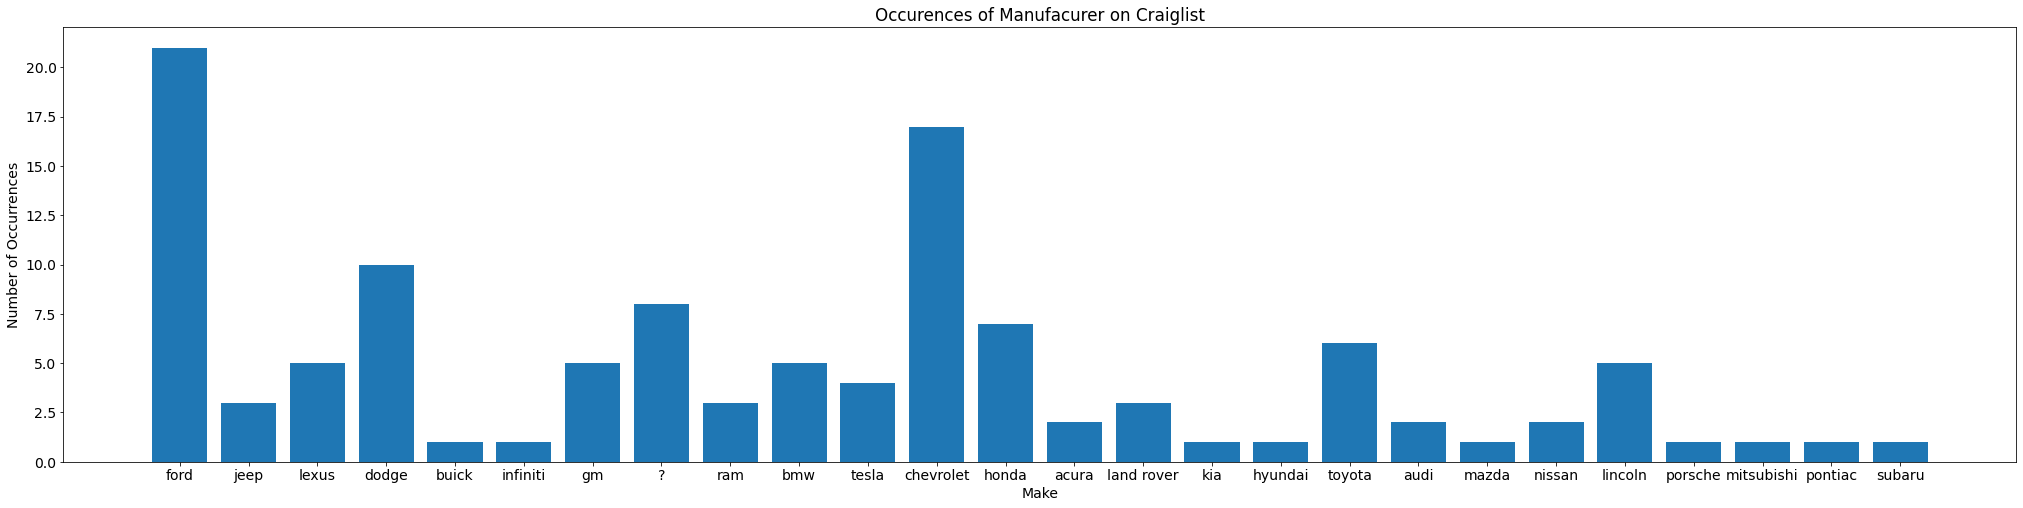

In [5]:
make_count = get_make_count(all_data)

plt.figure(figsize=(35, 8))
plt.rcParams.update({'font.size': 14})
plt.title("Occurences of Manufacurer on Craiglist")
plt.xlabel("Make")
plt.ylabel("Number of Occurrences")
bar = plt.bar(make_count.keys(), make_count.values())

# Average Price by Make 

{'ford': 25854.48, 'jeep': 34166.67, 'lexus': 17369.8, 'dodge': 32314.9, 'buick': 5800.0, 'infiniti': 26500.0, 'gm': 35660.0, '?': 12675.0, 'ram': 71500.0, 'bmw': 32940.0, 'tesla': 66875.0, 'chevrolet': 29779.29, 'honda': 17200.0, 'acura': 21700.0, 'land rover': 23266.67, 'kia': 12000.0, 'hyundai': 3800.0, 'toyota': 17529.17, 'audi': 65000.0, 'mazda': 15750.0, 'nissan': 6500.0, 'lincoln': 9840.0, 'porsche': 22500.0, 'mitsubishi': 6000.0, 'pontiac': 4500.0, 'subaru': 26000.0}


<BarContainer object of 26 artists>

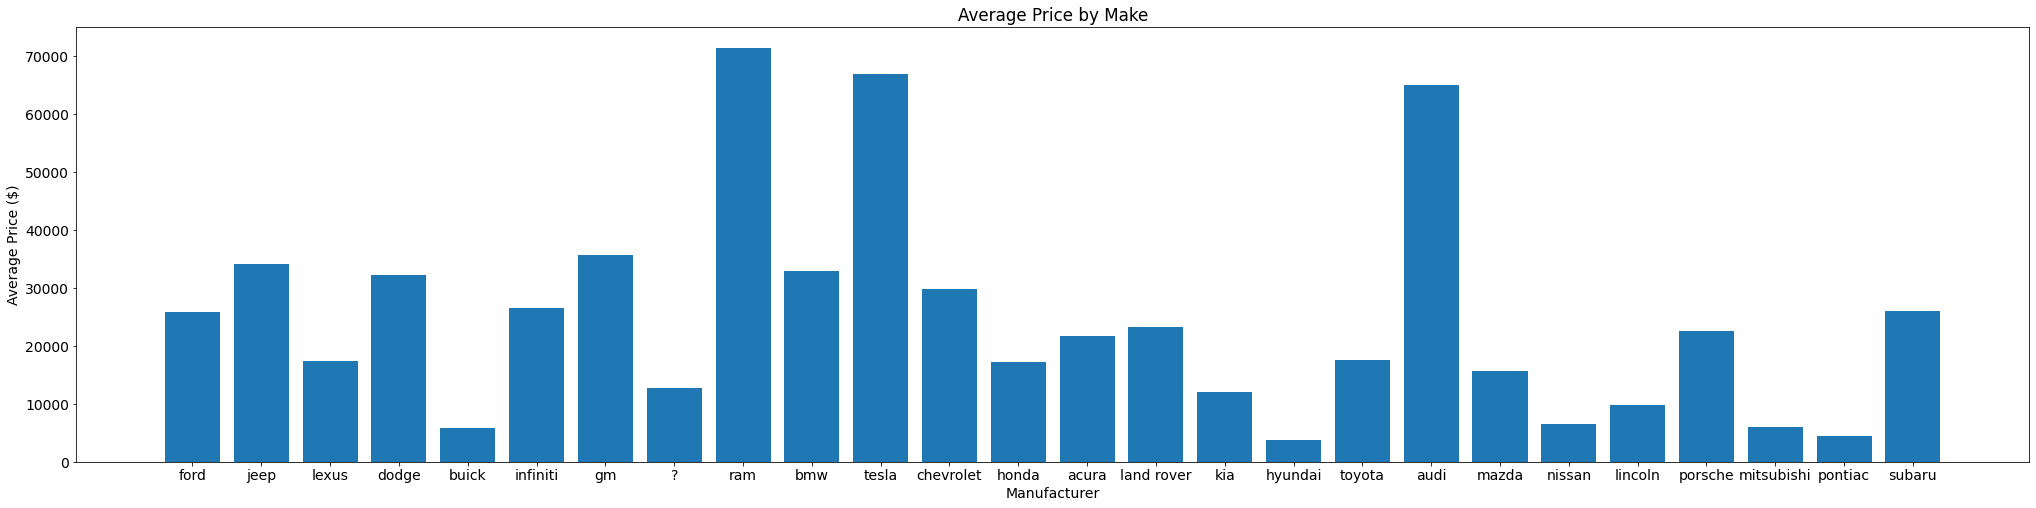

In [6]:
from importlib import reload
plt=reload(plt)

total_price = {}
for row in all_data.iloc:
    curr_price = int(row['price'].replace('$', '').replace(',', ''))
    if row['make'] not in total_price:
        total_price[row['make']] = curr_price
    else:
        total_price[row['make']] += curr_price

avg_price = {}
for (k,v), (k2,v2) in zip(total_price.items(), make_count.items()):
    avg_price[k] = round(v / v2, 2)

print(avg_price)

plt.figure(figsize=(35, 8))
plt.rcParams.update({'font.size': 14})
plt.title('Average Price by Make')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price ($)')

plt.bar(avg_price.keys(), avg_price.values())